In [1]:
import yfinance as yf

# Fetching the Coca-Cola stock data (KO) from the NYSE
coca_cola_stock = yf.Ticker("KO")

# Getting historical market data for Coca-Cola stock (last 1 year)
coca_cola_data = coca_cola_stock.history(period="1y")

# Displaying the first few rows of the data
print(coca_cola_data.head())


                                Open       High        Low      Close  \
Date                                                                    
2024-03-27 00:00:00-04:00  59.024654  59.646068  58.937268  59.257683   
2024-03-28 00:00:00-04:00  59.364489  59.481003  59.228555  59.403328   
2024-04-01 00:00:00-04:00  59.403327  59.519841  58.869299  58.917847   
2024-04-02 00:00:00-04:00  58.694527  58.966395  58.364401  58.403240   
2024-04-03 00:00:00-04:00  58.306146  58.636272  58.043986  58.092537   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-03-27 00:00:00-04:00  12551200        0.0           0.0  
2024-03-28 00:00:00-04:00  13683500        0.0           0.0  
2024-04-01 00:00:00-04:00  11668700        0.0           0.0  
2024-04-02 00:00:00-04:00  13017300        0.0           0.0  
2024-04-03 00:00:00-04:00  13672900        0.0           0.0  


In [5]:
# Reset index to make Date a column instead of index
df = coca_cola_data.reset_index()

# Display first few rows
print(df.head())

                       Date       Open       High        Low      Close  \
0 2024-03-27 00:00:00-04:00  59.024654  59.646068  58.937268  59.257683   
1 2024-03-28 00:00:00-04:00  59.364489  59.481003  59.228555  59.403328   
2 2024-04-01 00:00:00-04:00  59.403327  59.519841  58.869299  58.917847   
3 2024-04-02 00:00:00-04:00  58.694527  58.966395  58.364401  58.403240   
4 2024-04-03 00:00:00-04:00  58.306146  58.636272  58.043986  58.092537   

     Volume  Dividends  Stock Splits  
0  12551200        0.0           0.0  
1  13683500        0.0           0.0  
2  11668700        0.0           0.0  
3  13017300        0.0           0.0  
4  13672900        0.0           0.0  


In [7]:
# Save to CSV
df.to_csv("stock_prices.csv", index=False)
print("Data saved to stock_prices.csv")

Data saved to stock_prices.csv


In [9]:
# Checking for missing values
print(coca_cola_data.isnull().sum())

# Dropping rows with missing values
coca_cola_data = coca_cola_data.dropna()

# Using only 'Close' price for prediction
coca_cola_data = coca_cola_data[['Close']]

# Resetting the index
coca_cola_data = coca_cola_data.reset_index()

# Converting the date to a numerical format (for machine learning)
coca_cola_data['Date'] = coca_cola_data['Date'].map(lambda x: x.timestamp())


Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and target variable
X = coca_cola_data[['Date']]
y = coca_cola_data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 11.172073719966747


In [19]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 2.6 MB/s eta 0:00:57
   ---------------------------------------- 0.3/150.0 MB 628.5 kB/s eta 0:03:59
   ---------------------------------------- 0.4/150.0 MB 636.6 kB/s eta 0:03:56
   ---------------------------------------- 0.4/150.0 MB 655.5 kB/s eta 0:03:49
   ---------------------------------------- 0.5/150.0 MB 655.2 kB/s eta 0:03:49
   ---------------------------------------- 0.5/150.0 MB 668.7 kB/s eta 0:03:44
   ---------------------------------------- 0.6/150.0 MB 678.8 kB/s eta 0:03:41
   ---------------------------------------- 0.6/150.0 MB 678.8 kB/s eta 0:03:41
   ---------------------------------------- 0.7/150.0 MB 697.5 kB/s eta 0:03:35
   ---------------------------------------- 0.7/150.0 MB 686.1 kB/s eta 0:03:38
   ---------------------------------------- 0.8/150.0 MB 702.9 kB/s eta 0:03:33
   ---------------------------------------- 0.8/150

In [21]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
X = coca_cola_data[['Date']]
y = coca_cola_data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 46.08660759582825
Root Mean Squared Error: 6.788711777342462


In [13]:
import numpy as np

# Predict future stock prices (next 5 days, for example)
future_dates = np.array([coca_cola_data['Date'].max() + (i * 86400) for i in range(1, 6)]).reshape(-1, 1)

# Make predictions
future_predictions = model.predict(future_dates)

print(f"Predicted future prices: {future_predictions}")


Predicted future prices: [68.02761135 68.04687746 68.06614357 68.08540968 68.10467579]


D:\anaconder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
# Reset index to make Date a column instead of index
df = future_predictions

# Display first few rows
df

array([68.02761135, 68.04687746, 68.06614357, 68.08540968, 68.10467579])

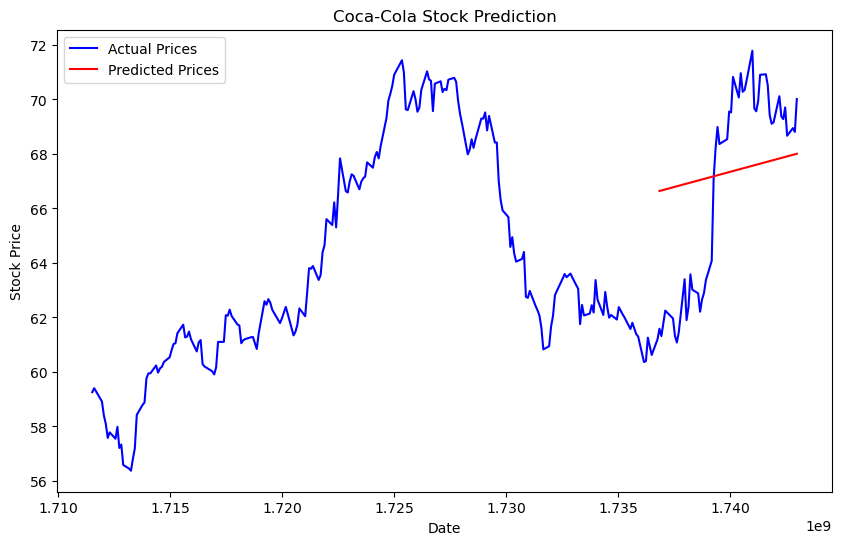

In [15]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted stock prices
plt.figure(figsize=(10,6))
plt.plot(coca_cola_data['Date'], y, label="Actual Prices", color="blue")
plt.plot(X_test, y_pred, label="Predicted Prices", color="red")
plt.title("Coca-Cola Stock Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [23]:
!git init

Initialized empty Git repository in C:/Users/teka/AI powered stock prediction and analysis/.git/


In [25]:
!git remote add origin https://github.com/jordanteka/AI-powered-coca-cola-stock-KO-prediction-and-analysis.git

In [33]:
!git add coca cola ko stock prices ai.ipynb stock_prices.csv

fatal: pathspec 'coca' did not match any files


In [ ]:
!git commit -m "Add Forex rates scraper and data"